Prøver å lage get_started-programmet "omvendt" (strømning horisontalt istedenfor vertikalt)
Importerer først det nødvendige.

In [1]:
import porepy as pp
import numpy as np
import scipy.sparse as sps

Make unit grid with Nx and Ny cells in x and y direction respectively. Compute_geometry is important elns.

In [2]:
Nx = Ny = 15
g = pp.CartGrid([Nx,Ny],[1,1])
g.compute_geometry()

Specify problem data (permeability, boundary conditions)

Permeability

In [3]:
Omega_1 = g.cell_centers[1, :] > 0.5
kxx, kyy, kxy = np.ones(g.num_cells), 1e2*np.ones(g.num_cells), 8*np.ones(g.num_cells)
kxx[Omega_1] = 1e2*np.ones(np.sum(Omega_1))
kyy[Omega_1] = np.ones(np.sum(Omega_1))
perm = pp.SecondOrderTensor(kxx=kxx, kyy=kyy, kxy=kxy)            
f = g.cell_volumes

Boundary conditions

In [4]:
b_faces = g.tags['domain_boundary_faces'].nonzero()[0]

labels = np.array(['dir']*b_faces.size)
labels[g.face_centers[0,b_faces] == 0] = 'neu'

bc = pp.BoundaryCondition(g,b_faces,labels)
bc_val = np.zeros(g.num_faces)

right_side = b_faces[g.face_centers[0,b_faces] == 1]
bc_val[right_side] = np.ones(right_side.size)

Group all parameters

In [5]:
specified_parameters = {'second_order_tensor': perm, 'source': f, 'bc': bc, 'bc_values': bc_val}
data = pp.initialize_default_data(g,{},'flow',specified_parameters)

Problem solution

In [6]:
solver = pp.Tpfa('flow')
solver.discretize(g,data)
A,b = solver.assemble_matrix_rhs(g,data)

p = sps.linalg.spsolve(A,b)

C:\Users\ingri\AppData\Local\Programs\Python\Python39\lib\site-packages\porepy\viz\plot_grid.py:241: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim3d(z)


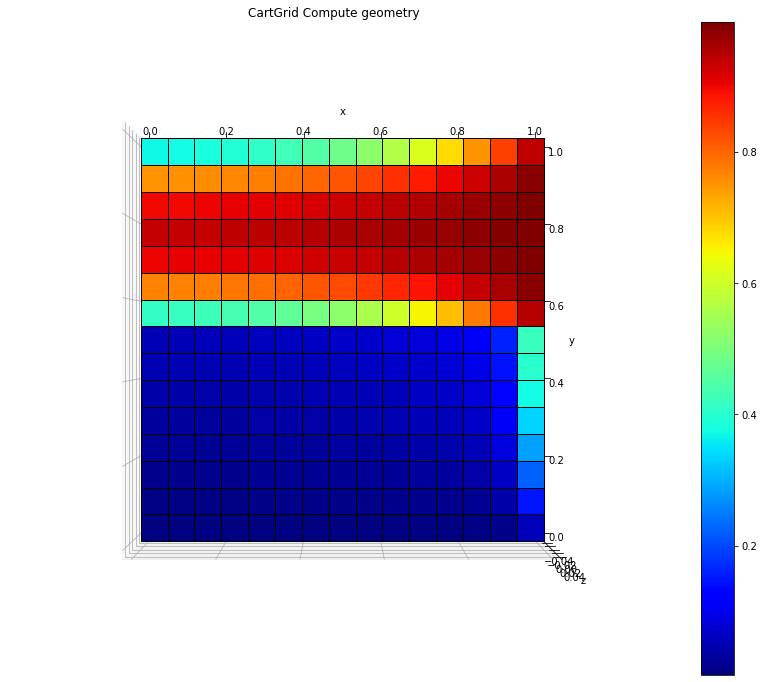

In [7]:
pp.plot_grid(g,p,figsize = (15,12))

In [8]:
gb,d = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.8], simplex=False)

In [9]:
for e,m in gb.edges():

IndentationError: expected an indented block (Temp/ipykernel_14340/1889885964.py, line 1)